**Chargement et aperçu du dataset**



In [6]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Dataset_Abandon_Scolaire.csv")
df.head()



Saving Dataset_Abandon_Scolaire.csv to Dataset_Abandon_Scolaire.csv


,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


**Analyse des valeurs manquantes**

In [11]:
df.isnull().sum()


,0
Age,0
Taux_presence,0
Nombre_retards,0
Note_moyenne,0
Abandon,0
Sexe_Homme,0
Situation_familiale_Divorcé,0
Situation_familiale_Enfants à charge,0
Situation_familiale_Marié,0


**Exploration et visualisation**

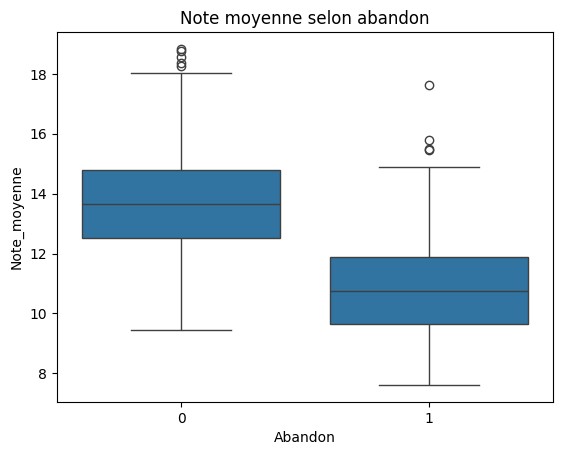

Médiane des notes pour les étudiants qui ont abandonné : 10.74
Médiane des notes pour les étudiants qui n'ont pas abandonné : 13.65
Les étudiants qui ont abandonné ont en moyenne des notes plus faibles que ceux qui n'ont pas abandonné.


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Abandon', y='Note_moyenne', data=df)
plt.title("Note moyenne selon abandon")
plt.show()

# Calcul des stats simples pour expliquer le graphe
grouped = df.groupby('Abandon')['Note_moyenne']

median_abandon = grouped.median()[1]    # médiane des notes quand Abandon = 1 (oui)
median_non_abandon = grouped.median()[0]  # médiane quand Abandon = 0 (non)

print(f"Médiane des notes pour les étudiants qui ont abandonné : {median_abandon:.2f}")
print(f"Médiane des notes pour les étudiants qui n'ont pas abandonné : {median_non_abandon:.2f}")

if median_abandon < median_non_abandon:
    print("Les étudiants qui ont abandonné ont en moyenne des notes plus faibles que ceux qui n'ont pas abandonné.")
else:
    print("Les étudiants qui ont abandonné ont en moyenne des notes plus élevées ou similaires à ceux qui n'ont pas abandonné.")



In [25]:
from sklearn.model_selection import train_test_split

X = df.drop("Abandon", axis=1)
y = df["Abandon"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Régression Logistique": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Arbre de Décision": DecisionTreeClassifier()
}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Régression Logistique
Accuracy  : 0.94
Précision : 0.69
Rappel    : 0.65
F1-Score  : 0.67
ROC AUC   : 0.95

KNN
Accuracy  : 0.95
Précision : 0.73
Rappel    : 0.65
F1-Score  : 0.69
ROC AUC   : 0.93

Arbre de Décision
Accuracy  : 0.93
Précision : 0.57
Rappel    : 0.62
F1-Score  : 0.59
ROC AUC   : 0.79


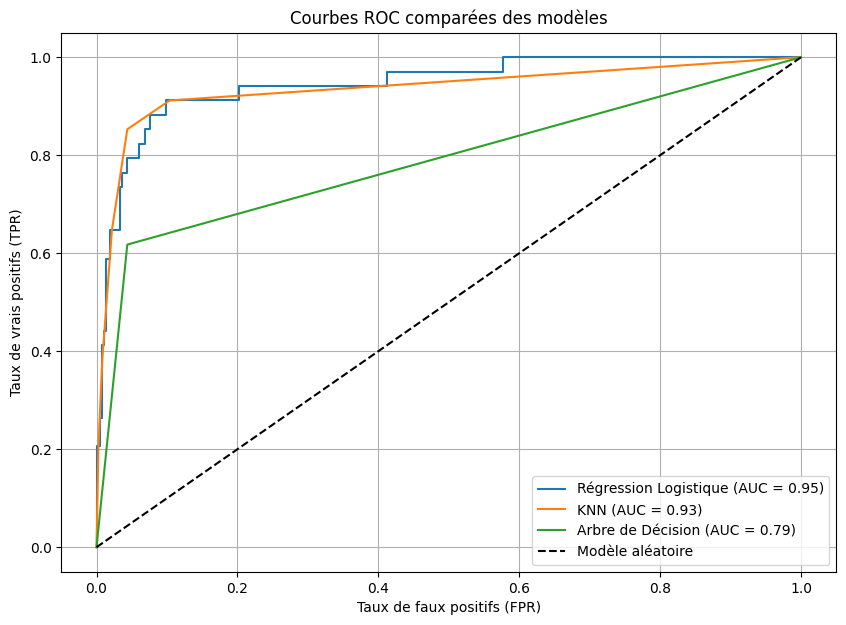

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve
)

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC + AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    else:
        auc = "N/A"

    print(f"\n{name}")
    print(f"Accuracy  : {acc:.2f}")
    print(f"Précision : {prec:.2f}")
    print(f"Rappel    : {rec:.2f}")
    print(f"F1-Score  : {f1:.2f}")
    print(f"ROC AUC   : {auc if auc == 'N/A' else round(auc, 2)}")

# Courbe de base (aléatoire)
plt.plot([0, 1], [0, 1], "k--", label="Modèle aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC comparées des modèles")
plt.legend()
plt.grid()
plt.show()


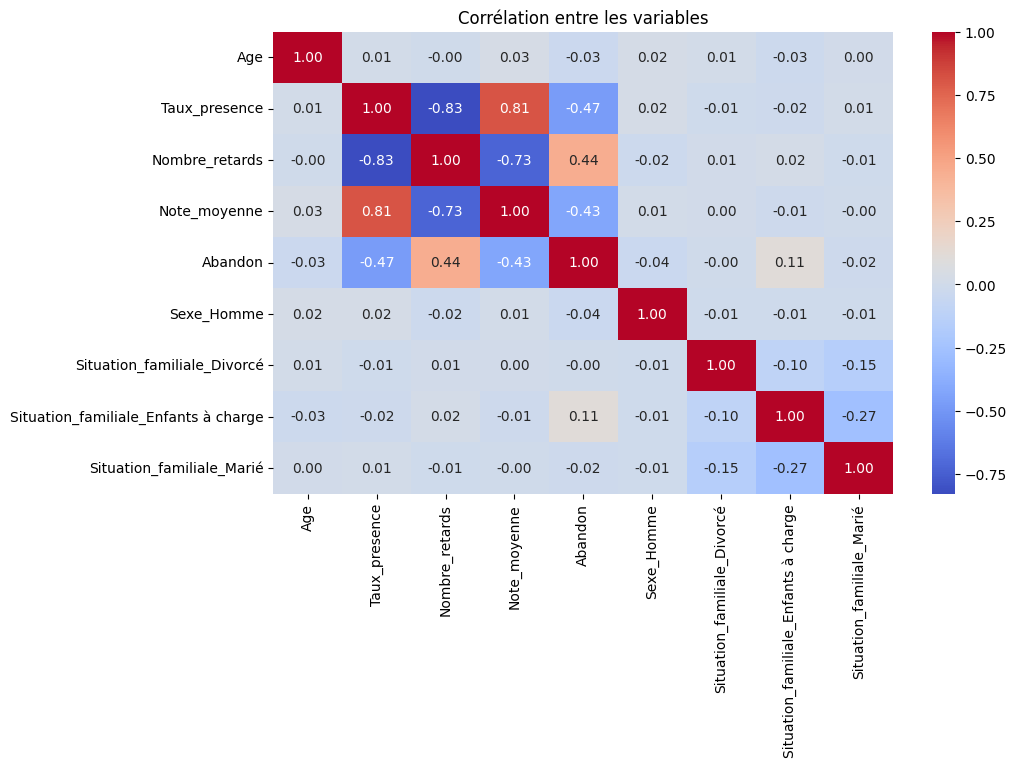


🔍 Interprétation des corrélations avec la variable 'Abandon' :

- 'Taux_presence' est négativement corrélée à l'abandon (corrélation = -0.47).
- 'Nombre_retards' est positivement corrélée à l'abandon (corrélation = 0.44).
- 'Note_moyenne' est négativement corrélée à l'abandon (corrélation = -0.43).
- 'Situation_familiale_Enfants à charge' a une corrélation faible avec l'abandon (corrélation = 0.11).
- 'Sexe_Homme' a une corrélation faible avec l'abandon (corrélation = -0.04).
- 'Age' a une corrélation faible avec l'abandon (corrélation = -0.03).
- 'Situation_familiale_Marié' a une corrélation faible avec l'abandon (corrélation = -0.02).
- 'Situation_familiale_Divorcé' a une corrélation faible avec l'abandon (corrélation = -0.00).


In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul des corrélations
correlation_matrix = df.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()

# Analyse des corrélations avec la variable cible
print("\n🔍 Interprétation des corrélations avec la variable 'Abandon' :\n")
cor_target = correlation_matrix["Abandon"].drop("Abandon")  # on exclut la corrélation de la variable avec elle-même
cor_target_sorted = cor_target.sort_values(key=abs, ascending=False)

for var, corr in cor_target_sorted.items():
    if abs(corr) >= 0.3:
        tendance = "positivement" if corr > 0 else "négativement"
        print(f"- '{var}' est {tendance} corrélée à l'abandon (corrélation = {corr:.2f}).")
    else:
        print(f"- '{var}' a une corrélation faible avec l'abandon (corrélation = {corr:.2f}).")


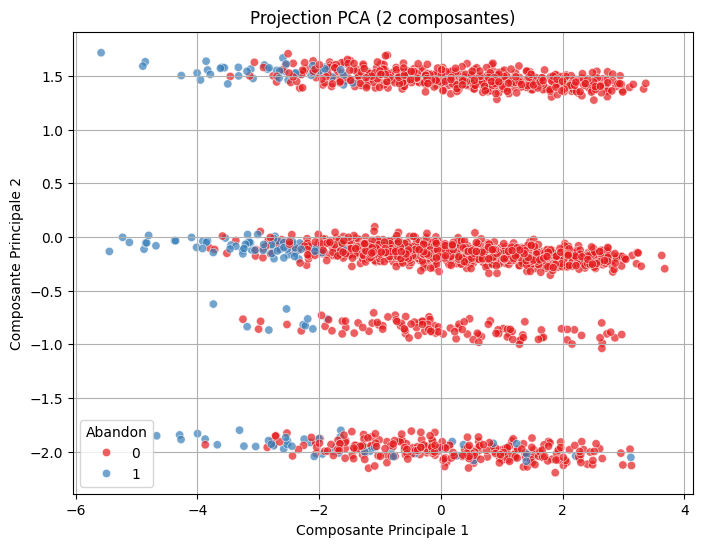


📊 Interprétation de la PCA :

- La 1ère composante principale explique 32.23% de la variance.
- La 2e composante principale explique 15.92% de la variance.
- Ensemble, ces 2 composantes capturent 48.15% de la variance totale des données.
⚠️ Ces deux composantes ne capturent qu'une partie limitée de l'information du dataset.

🧠 Lecture du graphique :
- Chaque point est un étudiant, projeté dans un plan réduit à 2 dimensions.
- Les couleurs indiquent s'il a abandonné (1) ou non (0).
- Si les deux groupes sont bien séparés visuellement, cela signifie que la PCA révèle une structure discriminante dans les données.


In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Standardisation des données
X_scaled = StandardScaler().fit_transform(X)

# 2. PCA avec 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Affichage du scatter plot des deux composantes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("Projection PCA (2 composantes)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.grid(True)
plt.show()

# 4. Explication automatique
var_exp = pca.explained_variance_ratio_
total_var = var_exp.sum()

print("\n📊 Interprétation de la PCA :\n")
print(f"- La 1ère composante principale explique {var_exp[0]*100:.2f}% de la variance.")
print(f"- La 2e composante principale explique {var_exp[1]*100:.2f}% de la variance.")
print(f"- Ensemble, ces 2 composantes capturent {total_var*100:.2f}% de la variance totale des données.")

if total_var >= 0.6:
    print("✅ Cela signifie qu'une grande partie de l'information du dataset est représentée dans ce plan 2D.")
else:
    print("⚠️ Ces deux composantes ne capturent qu'une partie limitée de l'information du dataset.")

print("\n🧠 Lecture du graphique :")
print("- Chaque point est un étudiant, projeté dans un plan réduit à 2 dimensions.")
print("- Les couleurs indiquent s'il a abandonné (1) ou non (0).")
print("- Si les deux groupes sont bien séparés visuellement, cela signifie que la PCA révèle une structure discriminante dans les données.")



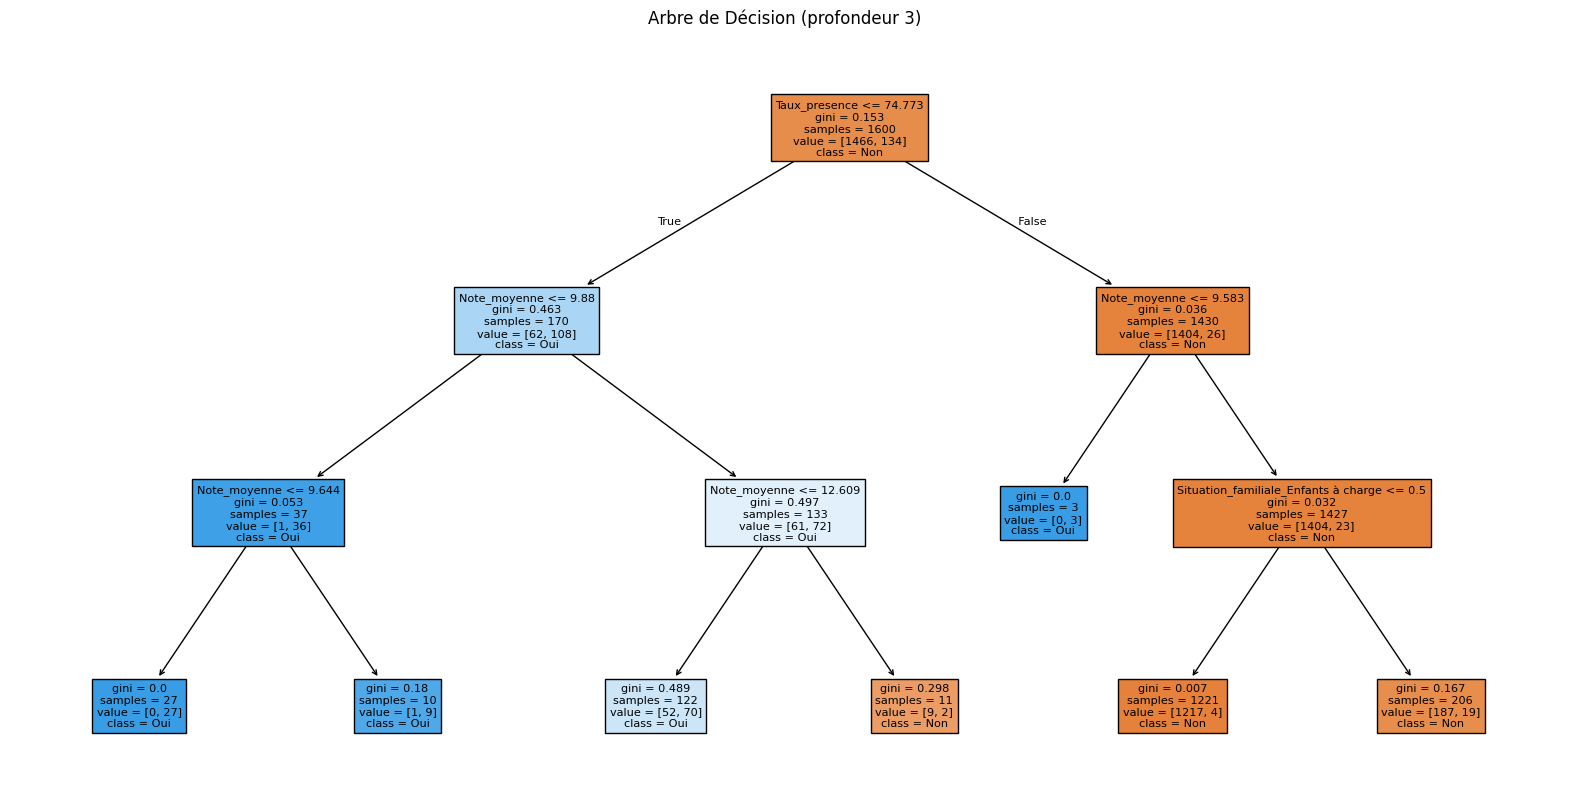


 Interprétation de l'Arbre de Décision :

- Profondeur maximale de l'arbre : 3
- Nombre total de feuilles : 7

 Chaque nœud de l'arbre représente une règle de décision sur une variable.
 Exemple : si une variable est <= à une certaine valeur, on va à gauche, sinon à droite.
 Les feuilles indiquent la prédiction finale (classe 0 = non-abandon, classe 1 = abandon).
 Les proportions dans chaque nœud montrent la répartition des classes parmi les données qui y aboutissent.

 Importance des variables (utilisées dans les décisions) :
- Taux_presence : 0.84
- Note_moyenne : 0.14
- Situation_familiale_Enfants à charge : 0.02


In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entraînement de l'arbre
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Affichage de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["Non", "Oui"], filled=True)
plt.title("Arbre de Décision (profondeur 3)")
plt.show()

# Interprétation automatique
print("\n Interprétation de l'Arbre de Décision :\n")
print(f"- Profondeur maximale de l'arbre : {tree.get_depth()}")
print(f"- Nombre total de feuilles : {tree.get_n_leaves()}\n")

print(" Chaque nœud de l'arbre représente une règle de décision sur une variable.")
print(" Exemple : si une variable est <= à une certaine valeur, on va à gauche, sinon à droite.")
print(" Les feuilles indiquent la prédiction finale (classe 0 = non-abandon, classe 1 = abandon).")
print(" Les proportions dans chaque nœud montrent la répartition des classes parmi les données qui y aboutissent.\n")

# Importance des variables
importances = tree.feature_importances_
important_features = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

print(" Importance des variables (utilisées dans les décisions) :")
for feature, importance in important_features:
    if importance > 0:
        print(f"- {feature} : {importance:.2f}")


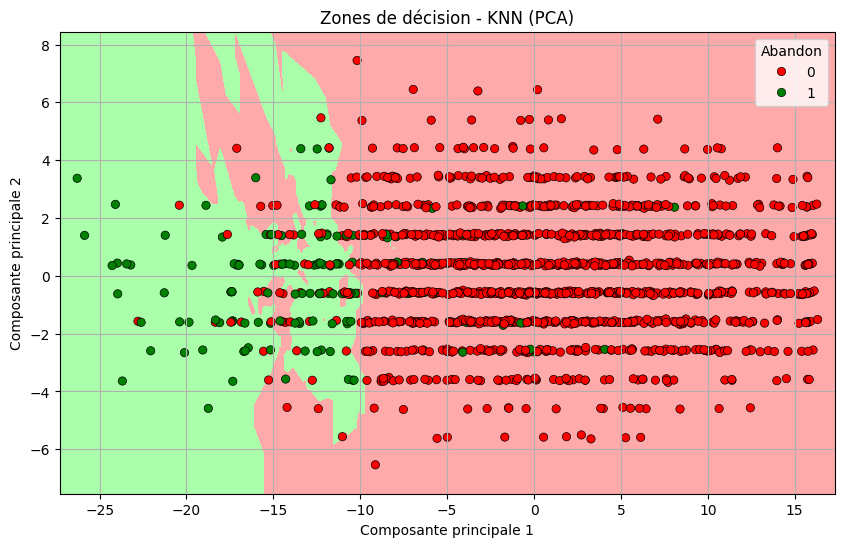


 Interprétation de la visualisation KNN sur données PCA :

- Les données ont été réduites à 2 dimensions grâce à la PCA.
- Cela permet de visualiser les points (étudiants) dans un plan 2D.
- Les couleurs de fond représentent les zones de décision du modèle KNN (k=5).
  ➤ Rouge : zone où KNN prédit 'abandon'.
  ➤ Vert  : zone où KNN prédit 'non-abandon'.
- Les points rouges/verts représentent les vrais étudiants du jeu d'entraînement (après PCA).
- Si les couleurs de fond épousent bien les clusters de points, c’est que KNN discrimine bien dans cet espace réduit.

 Ces 2 composantes principales expliquent 96.40% de la variance totale des données.
 La projection conserve une bonne partie de l'information.


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Zones de décision
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=['red', 'green'], edgecolor='k')
plt.title("Zones de décision - KNN (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()

#  Explication automatique
print("\n Interprétation de la visualisation KNN sur données PCA :\n")
print(f"- Les données ont été réduites à 2 dimensions grâce à la PCA.")
print(f"- Cela permet de visualiser les points (étudiants) dans un plan 2D.")
print(f"- Les couleurs de fond représentent les zones de décision du modèle KNN (k=5).")
print(f"  ➤ Rouge : zone où KNN prédit 'abandon'.")
print(f"  ➤ Vert  : zone où KNN prédit 'non-abandon'.")
print(f"- Les points rouges/verts représentent les vrais étudiants du jeu d'entraînement (après PCA).")
print(f"- Si les couleurs de fond épousent bien les clusters de points, c’est que KNN discrimine bien dans cet espace réduit.")

# Bonus : taux de variance expliquée
var_exp = pca.explained_variance_ratio_.sum()
print(f"\n Ces 2 composantes principales expliquent {var_exp*100:.2f}% de la variance totale des données.")
if var_exp < 0.6:
    print(" Cela signifie que la projection est assez compressée : l’information est partiellement conservée.")
else:
    print(" La projection conserve une bonne partie de l'information.")



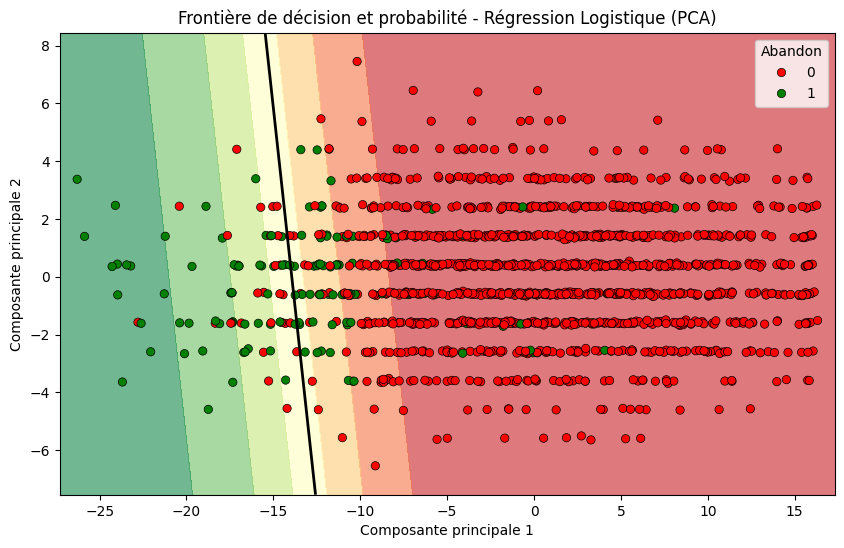

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Réduction en 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entraînement du modèle
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

# Création du maillage
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prédiction des probabilités sur la grille
Z_prob = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_prob = Z_prob.reshape(xx.shape)

# Affichage
plt.figure(figsize=(10, 6))
# Affiche la probabilité avec un dégradé (fond coloré)
plt.contourf(xx, yy, Z_prob, alpha=0.6, cmap='RdYlGn')

# Affiche la frontière de décision où probabilité = 0.5
contour = plt.contour(xx, yy, Z_prob, levels=[0.5], colors='black', linewidths=2)

# Points d'entraînement avec couleurs selon la classe
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train,
                palette=['red', 'green'], edgecolor='k')

plt.title("Frontière de décision et probabilité - Régression Logistique (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()



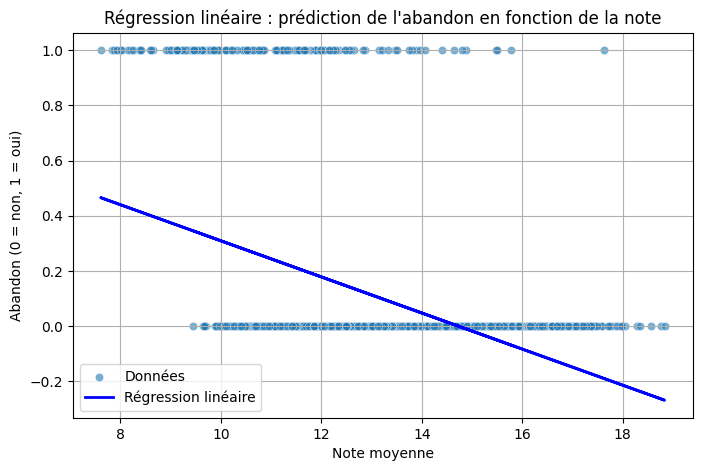

R2 : 0.18
RMSE : 0.25


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Variable explicative : Note_moyenne
X_lin = df[['Note_moyenne']]
y_lin = df['Abandon']

# Modèle de régression linéaire
reg = LinearRegression()
reg.fit(X_lin, y_lin)

# Prédictions
y_pred = reg.predict(X_lin)

# Visualisation : droite de régression
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_lin['Note_moyenne'], y=y_lin, alpha=0.6, label="Données")
plt.plot(X_lin['Note_moyenne'], y_pred, color='blue', linewidth=2, label="Régression linéaire")
plt.title("Régression linéaire : prédiction de l'abandon en fonction de la note")
plt.xlabel("Note moyenne")
plt.ylabel("Abandon (0 = non, 1 = oui)")
plt.legend()
plt.grid()
plt.show()

# Métriques
r2 = r2_score(y_lin, y_pred)
rmse = np.sqrt(mean_squared_error(y_lin, y_pred))

print(f"R2 : {r2:.2f}")
print(f"RMSE : {rmse:.2f}")


1. **Quels modèles fonctionnent le mieux ? Pourquoi ?**
Meilleur modèle global : **KNN**
avec
Accuracy = 0.95 (plus élevée)
Précision = 0.73 (plus élevée)
F1-Score = 0.69 (meilleur équilibre précision-rappel)
ROC AUC = 0.93 (très bon)

**Régression logistique** est proche, avec un très bon ROC AUC (0.95), ce qui signifie qu'elle classe bien globalement, mais sa précision est un peu plus faible.

**Arbre de décision** est le moins performant (accuracy, précision, F1-score plus faibles, ROC AUC nettement plus bas).

**Pourquoi **?
KNN profite bien de la structure locale des données, la régression logistique modélise une relation linéaire entre variables et la cible, et l’arbre, avec une profondeur limitée, peut être trop simple ou sur-appris selon les cas.

2. **Quelles sont les limites du modèle ? Des données ?**
**Modèles** :

KNN peut être lent sur de gros jeux de données, sensible aux données bruitées et à l’échelle des variables.

Régression logistique suppose une relation linéaire entre les variables et la cible, ce qui peut être limitant si la vraie relation est non linéaire.

Arbre de décision avec petite profondeur peut sous-apprendre, trop grand peut sur-apprendre.

**Données** :

Qualité et quantité : peu d’échantillons, variables manquantes, bruit ou variables non pertinentes limitent la performance.

Déséquilibre de classes : si les classes sont déséquilibrées, certaines métriques (accuracy) peuvent être trompeuses.

Variables non-informative ou corrélées peuvent nuire.

3. **Quelle interprétation peut-on faire des métriques obtenues ?**
Accuracy (~0.93-0.95) : le pourcentage global de bonnes prédictions est élevé, donc le modèle est efficace globalement.

Précision (0.57 à 0.73) : sur les prédictions positives (abandons), la proportion qui est correcte varie, KNN est meilleur ici.

Rappel (~0.62-0.65) : proportion d’abandons correctement détectés — un rappel moyen, donc certains abandons sont manqués.

F1-Score (0.59 à 0.69) : compromis entre précision et rappel — autour de 0.6-0.7, modéré, pas excellent.

ROC AUC (0.79 à 0.95) : capacité à distinguer les classes — la régression logistique et KNN sont très bonnes, arbre moins.

4. **Que signifie une bonne ou mauvaise précision dans ce contexte ?**
Bonne précision : peu de faux positifs — parmi les étudiants prédits en abandon, peu se révèlent finalement non-abandons. Utile si tu veux éviter d’alerter trop souvent à tort (ex : interventions coûteuses).

Mauvaise précision : beaucoup de faux positifs — interventions ou alertes inutiles.

Et dans ce contexte d’abandon scolaire, il faut aussi regarder le rappel car :
Un rappel faible signifie qu’on rate beaucoup d’étudiants qui abandonnent, ce qui est problématique, car ces cas ne seront pas pris en charge.

Un compromis est souvent nécessaire entre précision et rappel selon l’objectif : prévenir au maximum l’abandon (favoriser rappel) ou éviter les fausses alertes (favoriser précision).